Lattice sizes: 100%|██████████████████████████████████████████████████████████████████████████████████| 4/4 [03:07<00:00, 46.77s/it]


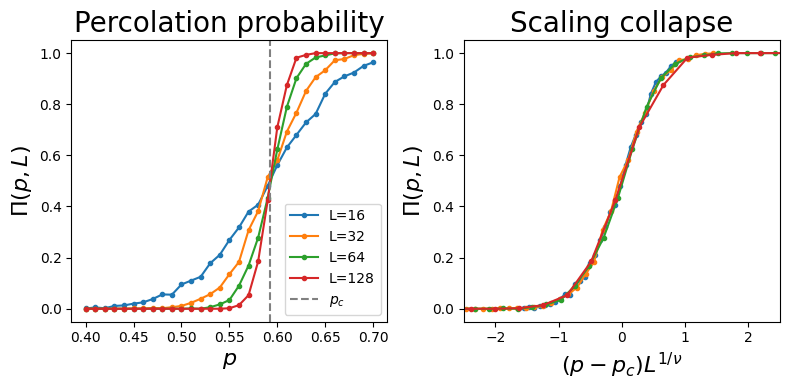

In [2]:
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from tqdm import tqdm

def generate_lattice(L, p):
    """Generate an LxL Boolean grid: True=occupied site with prob p."""
    return np.random.rand(L, L) < p

def percolates(grid):
    """Check if grid percolates top-to-bottom using BFS."""
    L = grid.shape[0]
    visited = np.zeros_like(grid, dtype=bool)
    queue = deque()
    for j in range(L):
        if grid[0, j]:
            visited[0, j] = True
            queue.append((0, j))
    while queue:
        i, j = queue.popleft()
        if i == L - 1:
            return True
        for ni, nj in [(i+1,j), (i-1,j), (i,j+1), (i,j-1)]:
            if 0 <= ni < L and 0 <= nj < L:
                if not visited[ni, nj] and grid[ni, nj]:
                    visited[ni, nj] = True
                    queue.append((ni, nj))
    return False

# Parameters
L_list = [16, 32, 64, 128]
p_vals = np.linspace(0.40, 0.70, 31)
p_c = 0.59275
nu = 4/3.0
runs = 1000

# Monte Carlo simulations with progress bars
Pi = {L: np.zeros_like(p_vals) for L in L_list}
for L in tqdm(L_list, desc="Lattice sizes"):
    for idx, p in enumerate(tqdm(p_vals, desc=f"p for L={L}")):
        count = 0
        for _ in range(runs):
            grid = generate_lattice(L, p)
            if percolates(grid):
                count += 1
        Pi[L][idx] = count / runs

# Plotting
plt.figure(figsize=(8, 4))

# Raw percolation probability vs p
plt.subplot(1, 2, 1)
for L in L_list:
    plt.plot(p_vals, Pi[L], marker='o', markersize=3, label=f'L={L}')
plt.axvline(p_c, color='gray', linestyle='--', label='$p_c$')
plt.xlabel('$p$', fontsize=16)
plt.ylabel('$\Pi(p,L)$', fontsize=16)
plt.title('Percolation probability', fontsize=20)
plt.legend(loc='lower right')

# Scaling collapse
plt.subplot(1, 2, 2)
for L in L_list:
    x_scaled = (p_vals - p_c) * L**(1/nu)
    plt.plot(x_scaled, Pi[L], marker='o', markersize=3, label=f'L={L}')
plt.xlabel(r'$(p-p_c)L^{1/\nu}$', fontsize=16)
plt.ylabel('$\Pi(p,L)$', fontsize=16)
plt.title('Scaling collapse', fontsize=20)
plt.xlim(-2.5, 2.5)

plt.tight_layout()
plt.show()